## Importing Libraries and Defining Variables

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import aes_cipher
import steg
import psnr_mse as pm



ee_password = "password123"       # password used for encryption and embedding
ed_password = "password12"       # password used for extracting and decryption
message = b"Hello, this is a secret message"         # message to encrypt and embed

stego_prefix = "stego_"
cover_path = os.path.join('images', 'standard', 'cover')
stego_path = os.path.join('images', 'standard', 'stego')

cover_images_list = [i for i in os.listdir(cover_path) if '.png' in i]
stego_images_list = [i for i in os.listdir(stego_path) if '.png' in i]


cover_image = cover_images_list[0]                    # change the index here
stego_image = stego_images_list[0]

output_stego_image = stego_prefix + cover_image

print("Cover image: " + cover_image)
print("Stego image: " + stego_image)
print("Output stego image: " + output_stego_image)


cover_image = os.path.join(cover_path, cover_image)                # cover image to encrypt and embed
stego_image = os.path.join(stego_path, stego_image)                # stego image to extract and decrypt
output_stego_image = os.path.join(stego_path, output_stego_image)  # output image after encryption and embedding



Cover image: airplane.png
Stego image: stego_airplane.png
Output stego image: stego_airplane.png


## Encryption and Embedding Process

### Encryption Process

In [2]:
def encrypt(message: bytes, password: str) -> bytes:
    """ AES Encryption """
    
    aes = aes_cipher.AES_Cipher(key=password, mode="ECB")
    ciphertext = aes.encrypt(data=message)
    print("Ciphertext:", ciphertext)
    return ciphertext

### Embedding Process

In [3]:
def embed(ciphertext: bytes, cover_image: str, output_stego_image: str) -> None:
    """ LSB Substitution Embedding """

    lsb_steg = steg.Steg(image=cover_image, stego=output_stego_image)
    print("Capacity of '" + os.path.basename(cover_image) + "': " + str(lsb_steg.get_max_capacity()//8) + " bytes")
    lsb_steg.embed(ciphertext)
    print(f"Output stego Image created in '{output_stego_image}'")

In [4]:
def show_image(image: str, title: str):
    """ Show Image """
    
    img_to_show = cv2.imread(image)
    img_to_show = cv2.cvtColor(img_to_show, cv2.COLOR_BGR2RGB)
    plt.imshow(img_to_show)
    plt.title(title)
    plt.show()

Ciphertext: b'\x19\x16L\x0e\xa7\xf6K\x90\xd5\x1c.v\xd2\x95R\x0bgw\xadQ\x8b\xcfI\xd3B\x1aU.Y%\xa7N'
Capacity of 'airplane.png': 98304 bytes
Output stego Image created in 'images\standard\stego\stego_airplane.png'


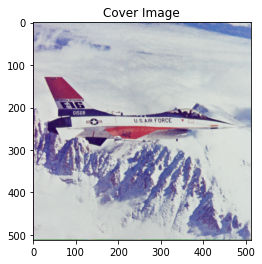

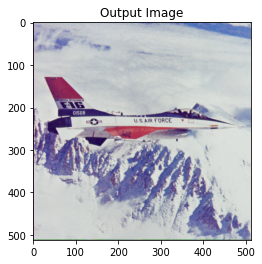

In [5]:
encrypted_text = encrypt(message=message, password=ed_password)
embed(ciphertext=encrypted_text, cover_image=cover_image, output_stego_image=output_stego_image)

show_image(image=cover_image, title="Cover Image")
show_image(image=output_stego_image, title="Output Image")

## Extracting and Decryption Process

### Extracting Process

In [8]:
def extract(stego_image: str) -> bytes:
    """ LSB Substitution Extraction """
    
    lsb_steg = steg.Steg(stego=stego_image)
    ciphertext = lsb_steg.extract()
    print("Extracted ciphertext: ", ciphertext)
    return ciphertext

### Decryption Process

In [9]:
def decrypt(ciphertext: bytes, password: str) -> None:
    """ AES Decryption """

    aes = aes_cipher.AES_Cipher(key=password, mode="ECB")
    message = aes.decrypt(ciphertext=ciphertext)
    print("Decrypted message:", message)

In [11]:
decrypt(encrypt(b"1234567890123456", '123'), '123')
len(encrypt(b"1234567890123456", '123'))

Ciphertext: b'\x10U\xd1XK\x89\xb6\x02\x08\x9dI\x1f\xba\x96?j\xc5\xff\xe8\xf3g,\xedD\xa5\x1c\x93\x96\xe5\xe7\xa9\xf7'
Decrypted message: b'1234567890123456'
Ciphertext: b'\x10U\xd1XK\x89\xb6\x02\x08\x9dI\x1f\xba\x96?j\xc5\xff\xe8\xf3g,\xedD\xa5\x1c\x93\x96\xe5\xe7\xa9\xf7'


32

In [38]:
extracted_ciphertext = extract(stego_image=output_stego_image)
decrypt(ciphertext=extracted_ciphertext, password=ed_password)
#extract_and_decrypt(password, stego_image)

Extracted ciphertext:  b'\xf5\x19\x0c\x98\xcb\xeb\xf7\x8c\x12\xcc\xa2\xc8g\xa3\x93\xf3h\xe3\x9b\xf0\xa9mdN\x86m\xa1\x90qf\xb87'
Decrypted message: b'Hello, this is a secret message'


## Evaluation Methods

### Cover Images and Stego Images

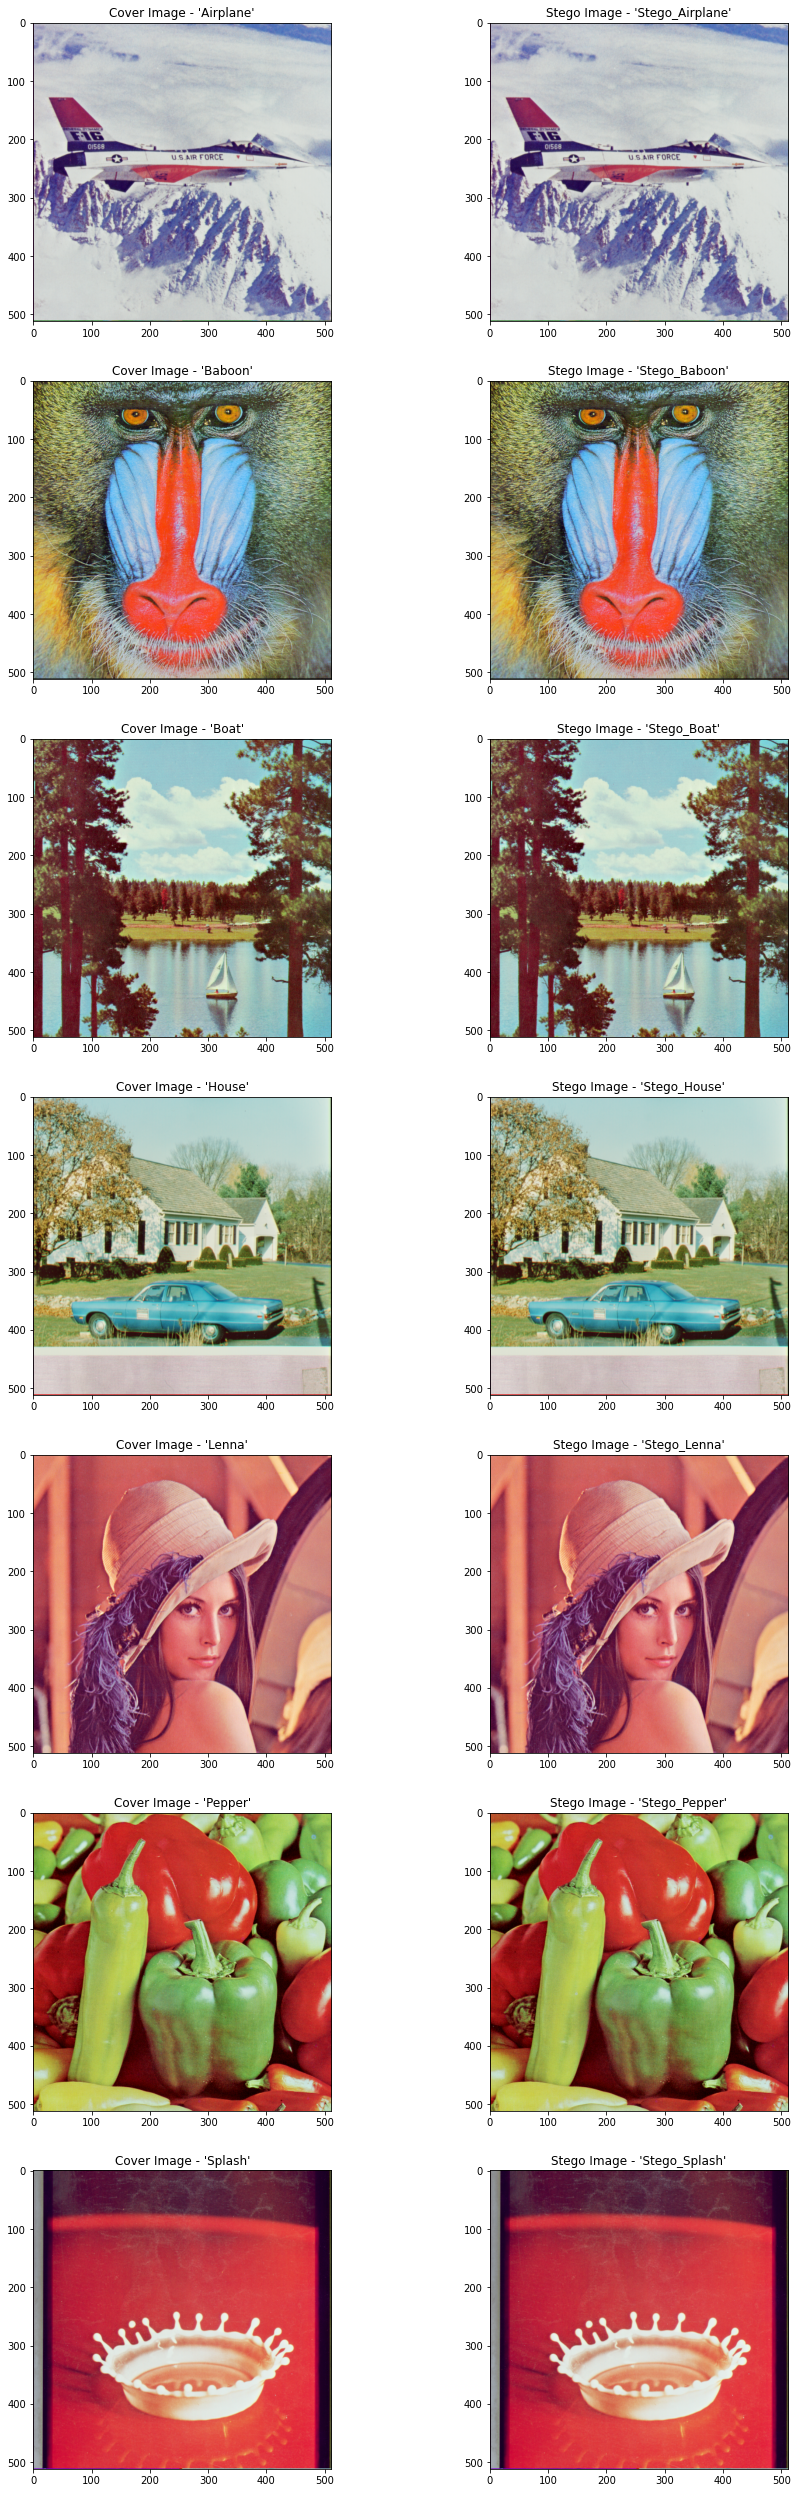

In [15]:
fig = plt.figure(figsize=(15, 45))
rows, columns = len(cover_images_list), 2


for i in range(rows):
    img = cv2.imread(os.path.join(cover_path, cover_images_list[i]))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig.add_subplot(rows, columns, (i*2)+1)
    plt.imshow(img)
    plt.title(f"Cover Image - '{os.path.basename(cover_images_list[i]).split('.')[0].title()}'")

for i in range(rows):
    img = cv2.imread(os.path.join(stego_path, stego_images_list[i]))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig.add_subplot(rows, columns, (i*2)+2)
    plt.imshow(img)
    plt.title(f"Stego Image - '{os.path.basename(stego_images_list[i]).split('.')[0].title()}'")
    
# plt.show()

### Capacity

In [10]:
for cover_image in cover_images_list:
    full_cover_image = os.path.join(cover_path, cover_image)
    lsb_steg = steg.Steg(image=full_cover_image)
    max_bits = lsb_steg.get_max_capacity()
    title = cover_image.split(".")[0].title()
    print(title)
    print("="*len(title))
    print(f"Max capacity in bits: {max_bits}")
    print(f"Max capacity in bytes: {max_bits // 8}")
    print(f"")

Airplane
Max capacity in bits: 786432
Max capacity in bytes: 98304

Baboon
Max capacity in bits: 786432
Max capacity in bytes: 98304

Boat
====
Max capacity in bits: 786432
Max capacity in bytes: 98304

House
=====
Max capacity in bits: 786432
Max capacity in bytes: 98304

Lenna
=====
Max capacity in bits: 786432
Max capacity in bytes: 98304

Pepper
Max capacity in bits: 786432
Max capacity in bytes: 98304

Splash
Max capacity in bits: 786432
Max capacity in bytes: 98304



### PSNR and MSE Results

In [17]:
for cover in cover_images_list:
    stego = stego_prefix + cover
    full_cover_path = os.path.join(cover_path, cover)
    full_stego_path = os.path.join(stego_path, stego)
#     print(full_cover_path, full_stego_path)
    original = cv2.imread(full_cover_path)
    stego_img = cv2.imread(full_stego_path)
    res_psnr = pm.PSNR(original, stego_img)
    res_mse = pm.MSE(original, stego_img)
    title = cover.split(".")[0].title()
    print(title)
    print("="*len(title))
    print("MSE:", res_mse)
    print("PSNR:", res_psnr)
    print(f"")

Airplane
MSE: 0.00022761027018229166
PSNR: 84.55888506559342

Baboon
MSE: 0.00021107991536458334
PSNR: 84.88633449499179

Boat
====
MSE: 0.00020599365234375
PSNR: 84.99226522996602

House
=====
MSE: 0.00021616617838541666
PSNR: 84.7829261616096

Lenna
=====
MSE: 0.00020853678385416666
PSNR: 84.93897689491536

Pepper
MSE: 0.00021235148111979166
PSNR: 84.8602506639165

Splash
MSE: 0.000202178955078125
PSNR: 85.07344413218783



### PSNR and MSE Relation to Different Message Size

In [20]:
import pprint

msg_len_list = [10, 50, 100, 500, 1000, 5000, 10000, 20000, 50000]
eval_vals = []
letter = b"a"

for cover_image in cover_images_list:
    full_cover_image = os.path.join("images", "standard", "pm_cover", cover_image)
    
    temp_psnr = []
    temp_mse = []
    for i in msg_len_list:
        full_stego_image = os.path.join("images", "standard", "pm_steg", stego_prefix+cover_image.split(".")[0]+"_"+str(i)+".png")
        lsb_steg = steg.Steg(image=full_cover_image, stego=full_stego_image)
        msg = letter*i
        lsb_steg.embed(msg)
    
        original = cv2.imread(full_cover_image)
        stego_img = cv2.imread(full_stego_image)
        res_psnr = pm.PSNR(original, stego_img)
        res_mse = pm.MSE(original, stego_img)
#         print(res_mse)
#         print(res_psnr)
        temp_psnr.append(float("{:.2f}".format(res_psnr)))
        temp_mse.append(float("{:.2e}".format(res_mse)))
    eval_vals.append([temp_mse, temp_psnr])
    
#     print(full_stego_path)
#     print(res_psnr)
#     print(res_mse)

pprint.pprint(eval_vals)

[[[8.65e-05, 0.000281, 0.000532, 0.00265, 0.00518, 0.0255, 0.051, 0.102, 0.255],
  [88.76, 83.64, 80.88, 73.9, 70.99, 64.06, 61.05, 58.04, 54.07]],
 [[9.66e-05, 0.000314, 0.000563, 0.0027, 0.00524, 0.0257, 0.0512, 0.102, 0.255],
  [88.28, 83.16, 80.62, 73.82, 70.93, 64.04, 61.04, 58.04, 54.07]],
 [[9.41e-05, 0.00028, 0.00051, 0.00251, 0.00513, 0.0254, 0.0506, 0.101, 0.254],
  [88.4, 83.66, 81.06, 74.13, 71.03, 64.08, 61.09, 58.07, 54.08]],
 [[0.000103, 0.00032, 0.000584, 0.00257, 0.00514, 0.0254, 0.0507, 0.101, 0.254],
  [88.0, 83.07, 80.47, 74.04, 71.02, 64.08, 61.08, 58.07, 54.09]],
 [[0.000103, 0.0003, 0.000573, 0.00269, 0.00533, 0.0258, 0.0513, 0.102, 0.256],
  [88.0, 83.36, 80.55, 73.83, 70.86, 64.02, 61.03, 58.03, 54.05]],
 [[8.01e-05, 0.000267, 0.000488, 0.00249, 0.00499, 0.0252, 0.0505, 0.1, 0.252],
  [89.09, 83.87, 81.24, 74.17, 71.15, 64.12, 61.09, 58.11, 54.12]],
 [[0.000102, 0.00029, 0.000538, 0.00256, 0.00507, 0.0252, 0.0505, 0.101, 0.253],
  [88.06, 83.51, 80.82, 74.04, 7

In [27]:
from tabulate import tabulate
    
for i, cover in enumerate(cover_images_list):
#     print('ok')
    tbt_data = []
    head = ['Bytes']
    head.extend(msg_len_list)
    mse_val = ['MSE']
    mse_val.extend(eval_vals[i][0])
    psnr_val = ['PSNR(dB)']
    psnr_val.extend([str(i) + " dB" for i in eval_vals[i][1]])
    tbt_data.append(mse_val)
    tbt_data.append(psnr_val)
#     print(mse_val[1])
#     print(tbt_data)
    print(f"MSE and PSNR Values of '{cover.split('.')[0].title()}.png' Depending on the Size of Hidden Message (in Bytes)")
    print(tabulate(tbt_data, headers=head, tablefmt="grid"))
    print("\n")

MSE and PSNR Values of 'Airplane.png' Depending on the Size of Hidden Message (in Bytes)
+----------+----------+----------+----------+---------+----------+----------+----------+----------+----------+
| Bytes    | 10       | 50       | 100      | 500     | 1000     | 5000     | 10000    | 20000    | 50000    |
+==========+==========+==========+==========+=========+==========+==========+==========+==========+==========+
| MSE      | 8.65e-05 | 0.000281 | 0.000532 | 0.00265 | 0.00518  | 0.0255   | 0.051    | 0.102    | 0.255    |
+----------+----------+----------+----------+---------+----------+----------+----------+----------+----------+
| PSNR(dB) | 88.76 dB | 83.64 dB | 80.88 dB | 73.9 dB | 70.99 dB | 64.06 dB | 61.05 dB | 58.04 dB | 54.07 dB |
+----------+----------+----------+----------+---------+----------+----------+----------+----------+----------+


MSE and PSNR Values of 'Baboon.png' Depending on the Size of Hidden Message (in Bytes)
+----------+----------+----------+----------+

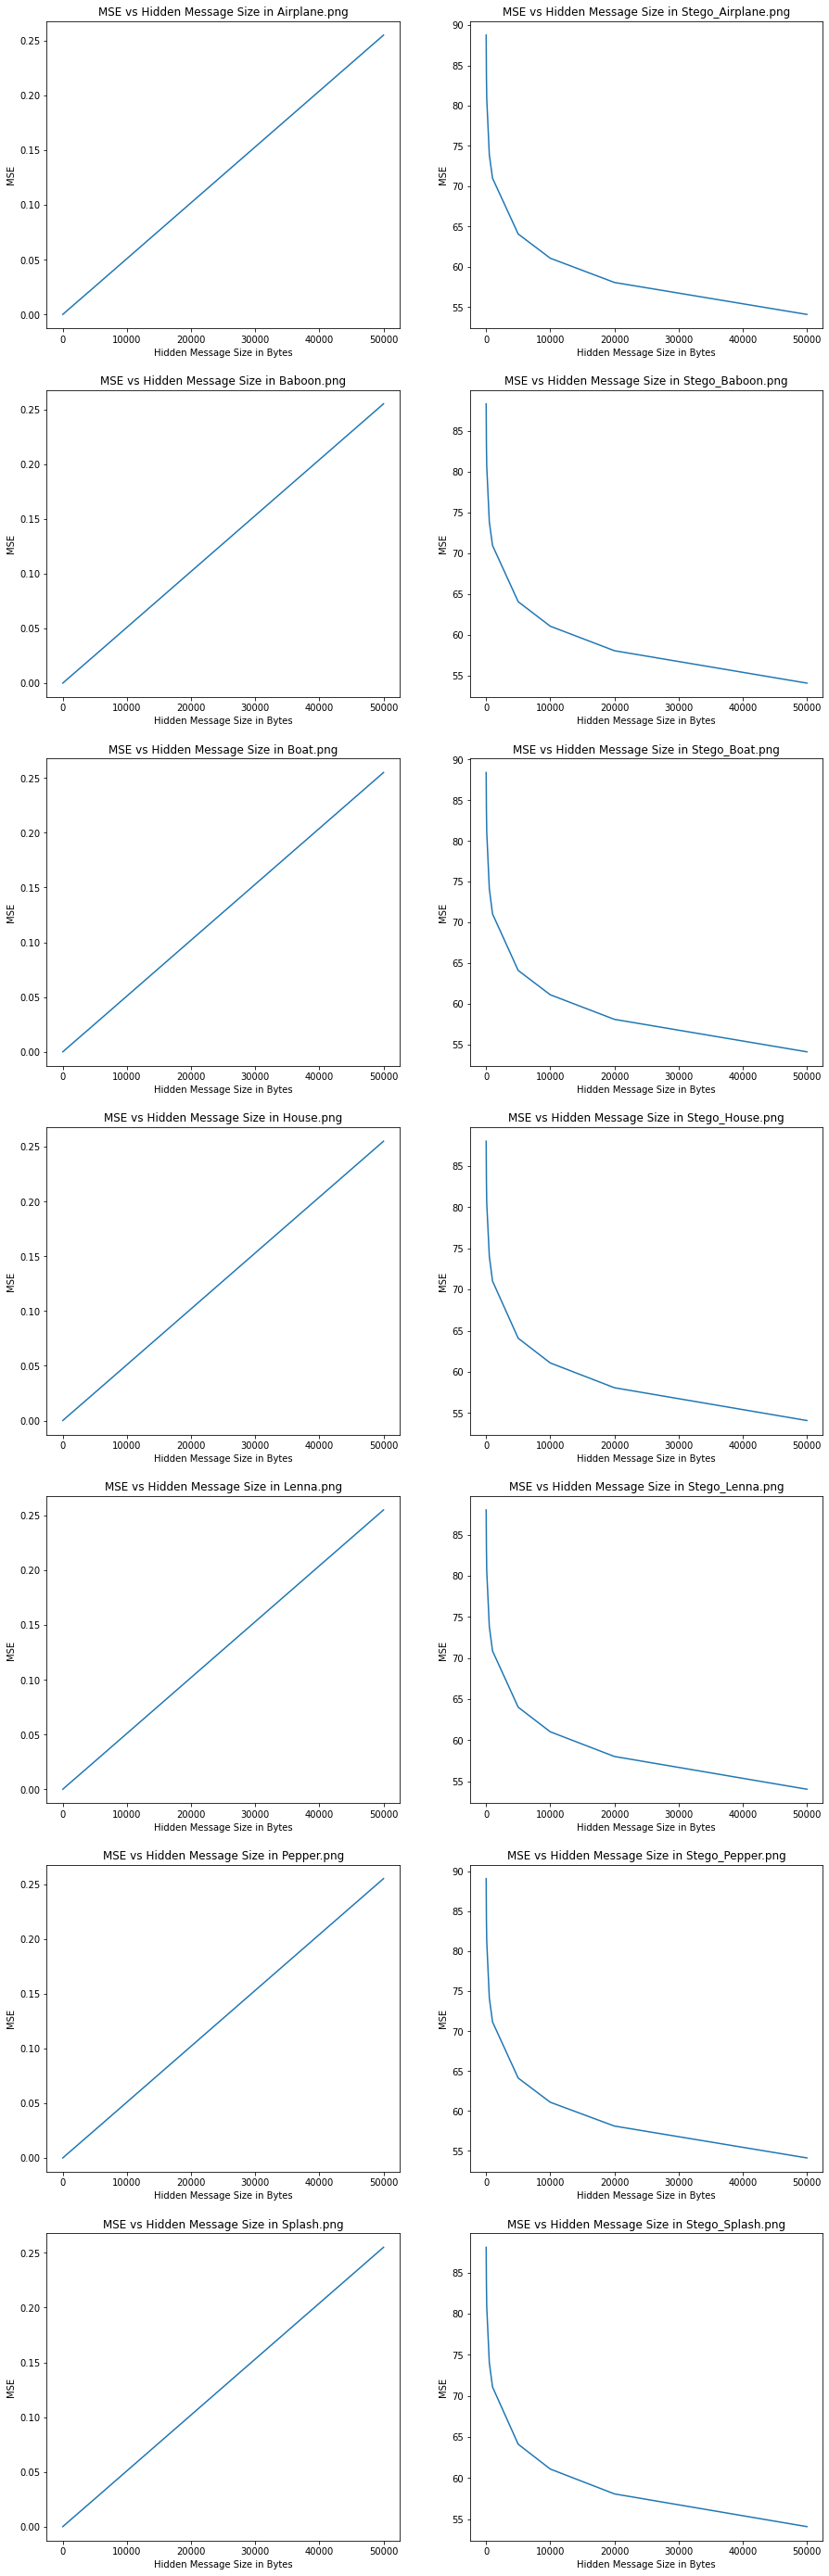

In [22]:
fig = plt.figure(figsize=(15, 50))
rows, columns = len(cover_images_list), 2

for i in range(rows):

    fig.add_subplot(rows, columns, (i*2)+1)
    plt.plot(msg_len_list, eval_vals[0][0])
    plt.xlabel('Hidden Message Size in Bytes')
    plt.ylabel('MSE')
    plt.title(f"MSE vs Hidden Message Size in {os.path.basename(cover_images_list[i]).split('.')[0].title()}.png")
    
    
for i in range(rows):

    fig.add_subplot(rows, columns, (i*2)+2)
    plt.plot(msg_len_list, eval_vals[i][1])
    plt.xlabel('Hidden Message Size in Bytes')
    plt.ylabel('MSE')
    plt.title(f"MSE vs Hidden Message Size in {os.path.basename(stego_images_list[i]).split('.')[0].title()}.png")


plt.show()



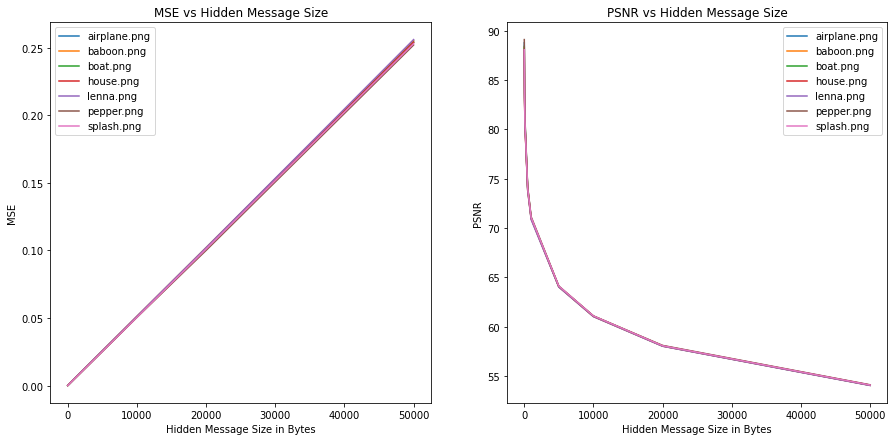

In [23]:

fig = plt.figure(figsize=(15, 7))
rows, columns = 1, 2

# MSE plot
fig.add_subplot(rows, columns, 1)
for i, cover_image in enumerate(cover_images_list):
    plt.plot(msg_len_list, eval_vals[i][0], label = cover_image)

plt.legend()
plt.xlabel('Hidden Message Size in Bytes')
plt.ylabel('MSE')
plt.title("MSE vs Hidden Message Size")


# PSNR plot
fig.add_subplot(rows, columns, 2)
for i, cover_image in enumerate(cover_images_list):
    plt.plot(msg_len_list, eval_vals[i][1], label = cover_image)

plt.legend()
plt.xlabel('Hidden Message Size in Bytes')
plt.ylabel('PSNR')
plt.title("PSNR vs Hidden Message Size")
                    
plt.show()

## Random Testings

In [44]:
extract(os.path.join("images", "standard", "pm_steg", "stego_airplane_10.png"))

Extracted ciphertext:  b'aaaaaaaaaa'


b'aaaaaaaaaa'

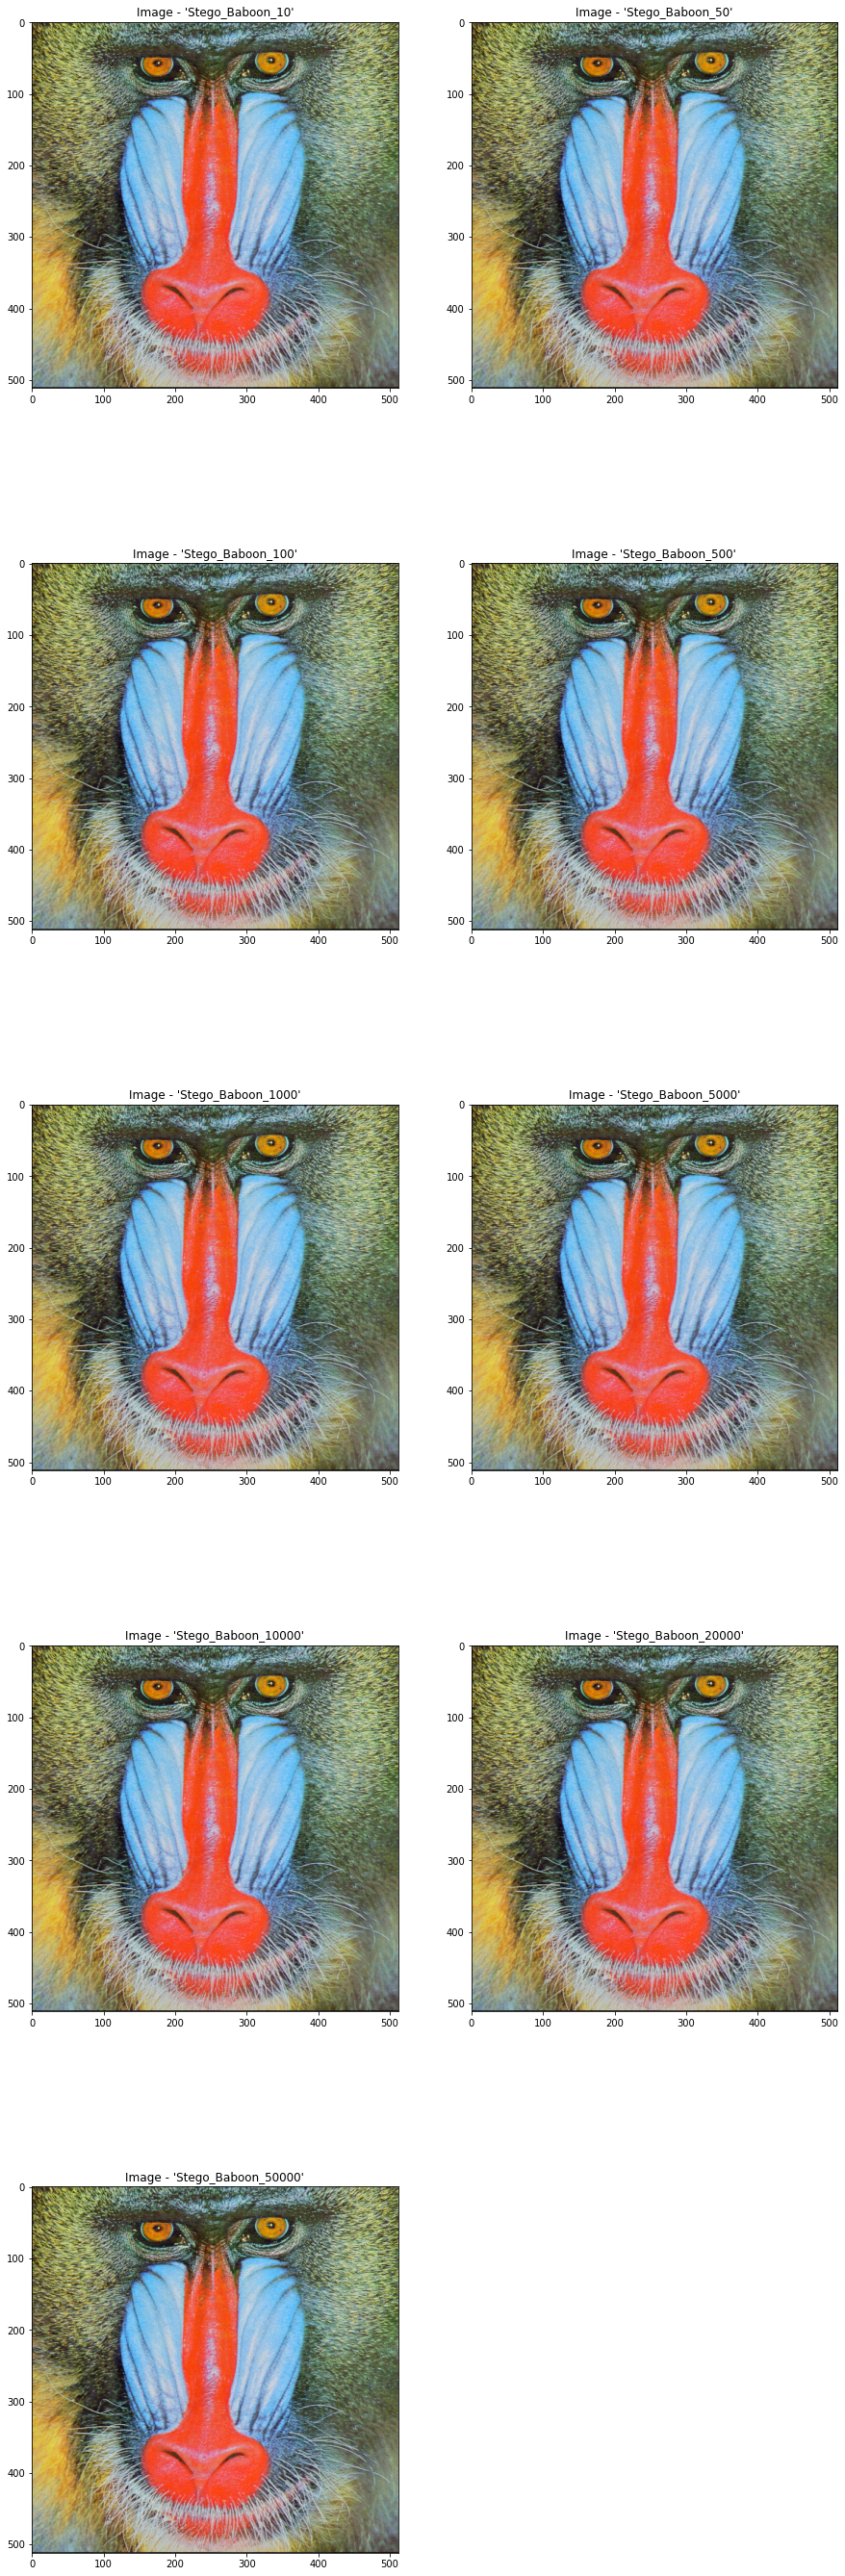

In [71]:
fig = plt.figure(figsize=(15, 50))
rows, columns = 5, 2

pm_steg_path = os.path.join("images", "standard", "pm_steg")

chosen_stego = stego_prefix + cover_images_list[1].split('.')[0]

for i in range(9):
    
    img = cv2.imread(os.path.join(pm_steg_path, f"{chosen_stego}_{msg_len_list[i]}.png"))
#     print(os.path.join(pm_steg_path, f"{cover_images_list[i].split('.')[0]}_{msg_len_list[i]}.png"))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)
    plt.title(f"Image - '{chosen_stego.title()}_{msg_len_list[i]}'")

plt.show()